In [1]:
import matplotlib.pyplot as plt
import numpy as np

PATH = "/Users/lucas/Documents/School/IMT/A2/S4/EfficienDL/02_01/lab1"
MODELS = ['ResNet18', 'VGG16', 'DenseNet121', 'PreActResNet18']

In [2]:
# load data
## Accuracies for cifar 10
densenet_accuracy_cifar10 = np.load(PATH + "/data_log/densenet_cifar_net_accuracies.npy")
preact_resnet_accuracy_cifar10 = np.load(PATH + "/data_log/preact_resnet_cifar_net_accuracies.npy")
resnet_accuracy_cifar10 = np.load(PATH + "/data_log/resnet_cifar_net_accuracies.npy")
vgg_accuracy_cifar10 = np.load(PATH + "/data_log/vgg_cifar_net_accuracies.npy")

## Accuracies for cifar 100
densenet_accuracy_cifar100 = np.load(PATH + "/data_log/densenet_cifar100_net_accuracies.npy")
preact_resnet_accuracy_cifar100 = np.load(PATH + "/data_log/preact_resnet_cifar100_net_accuracies.npy")
resnet_accuracy_cifar100 = np.load(PATH + "/data_log/resnet_cifar100_net_accuracies.npy")
vgg_accuracy_cifar100 = np.load(PATH + "/data_log/vgg_cifar100_net_accuracies.npy")

## Training loss for cifar 10
densenet_loss_cifar10 = np.load(PATH + "/data_log/densenet_cifar_net_training_loss.npy")
preact_resnet_loss_cifar10 = np.load(PATH + "/data_log/preact_resnet_cifar_net_training_loss.npy")
resnet_loss_cifar10 = np.load(PATH + "/data_log/resnet_cifar_net_training_loss.npy")
vgg_loss_cifar10 = np.load(PATH + "/data_log/vgg_cifar_net_training_loss.npy")

## Figure Accuracy vs Number of Parameters

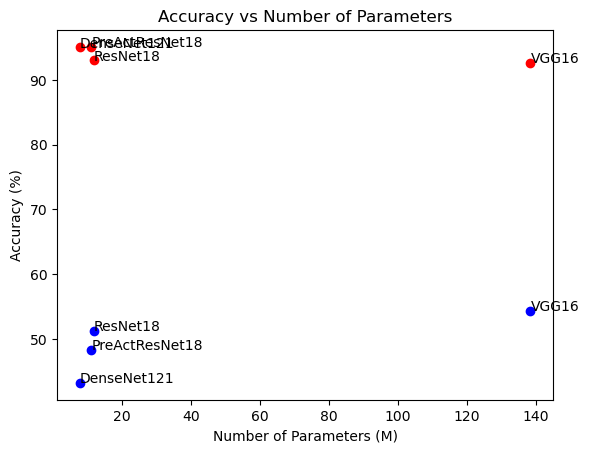

In [3]:
# Example data
num_parameters = [11.69, 138.357544, 7.628484, 11]
example_accuracy = [93.02, 92.64, 95.04, 95.11]
my_accuracy = [resnet_accuracy_cifar10[0], vgg_accuracy_cifar10[0], densenet_accuracy_cifar10[0], preact_resnet_accuracy_cifar10[0]]

# Plotting the graph
plt.plot(num_parameters, example_accuracy, 'ro')
plt.plot(num_parameters, my_accuracy, 'bo')
plt.xlabel('Number of Parameters (M)')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs Number of Parameters')
for i, model in enumerate(MODELS):
    plt.annotate(model, (num_parameters[i], example_accuracy[i]))
    plt.annotate(model, (num_parameters[i], my_accuracy[i]))
    
plt.savefig(PATH + "/imgs/AccVSNumPara.png")
plt.show()

## Accuracies

In [6]:
def plotAccuracy(accuracy, title):
    n_classes = len(accuracy)-1
    
    horizontal_axe_labels = []
    for i in range(n_classes):
        horizontal_axe_labels.append(f"class {i+1}")
        
    plt.figure(figsize=(14, 7))
    plt.subplots_adjust(left=0.05, right=0.95, bottom=0.1, top=0.9)
    plt.axhline(y=accuracy[0], color='r', linestyle='-.', label='Average')
    plt.bar(horizontal_axe_labels, accuracy[1:])
    plt.xlabel("Classes")
    plt.ylabel("Accuracy")
    plt.xticks(rotation=90)
    plt.legend()
    plt.title(title)
    plt.savefig(PATH + "/imgs/" + title + ".png")
    plt.show()

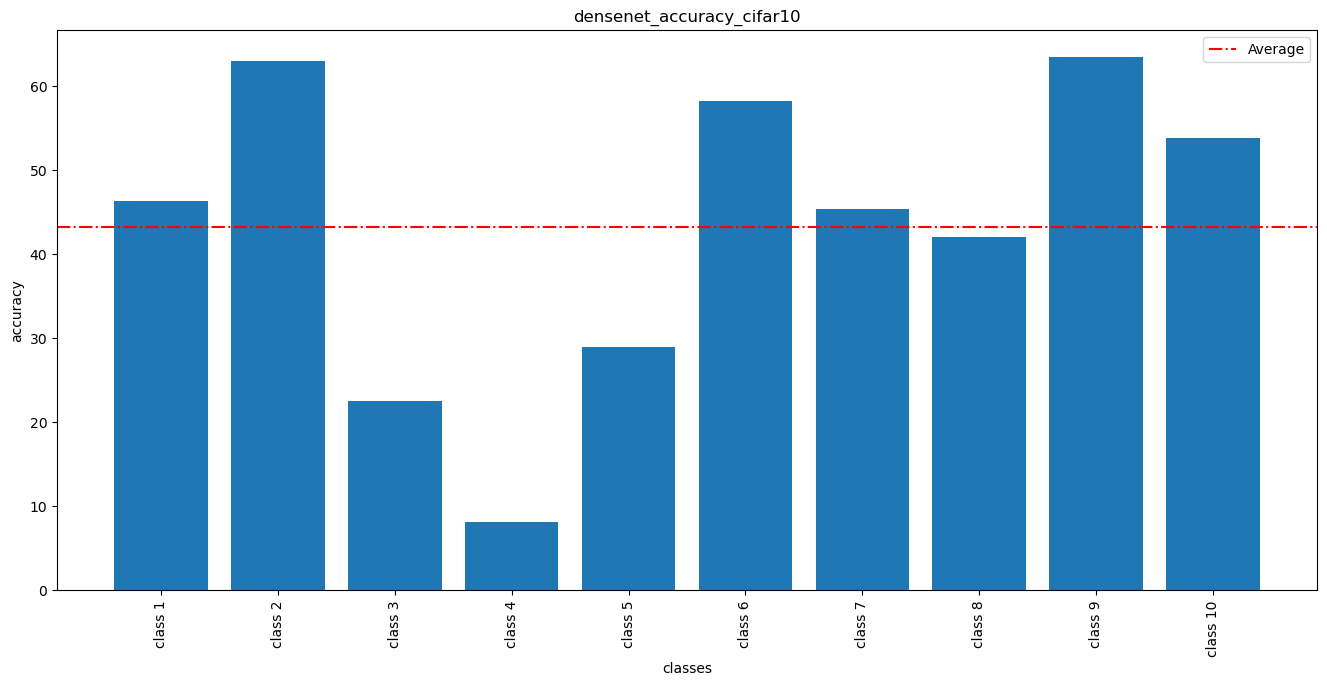

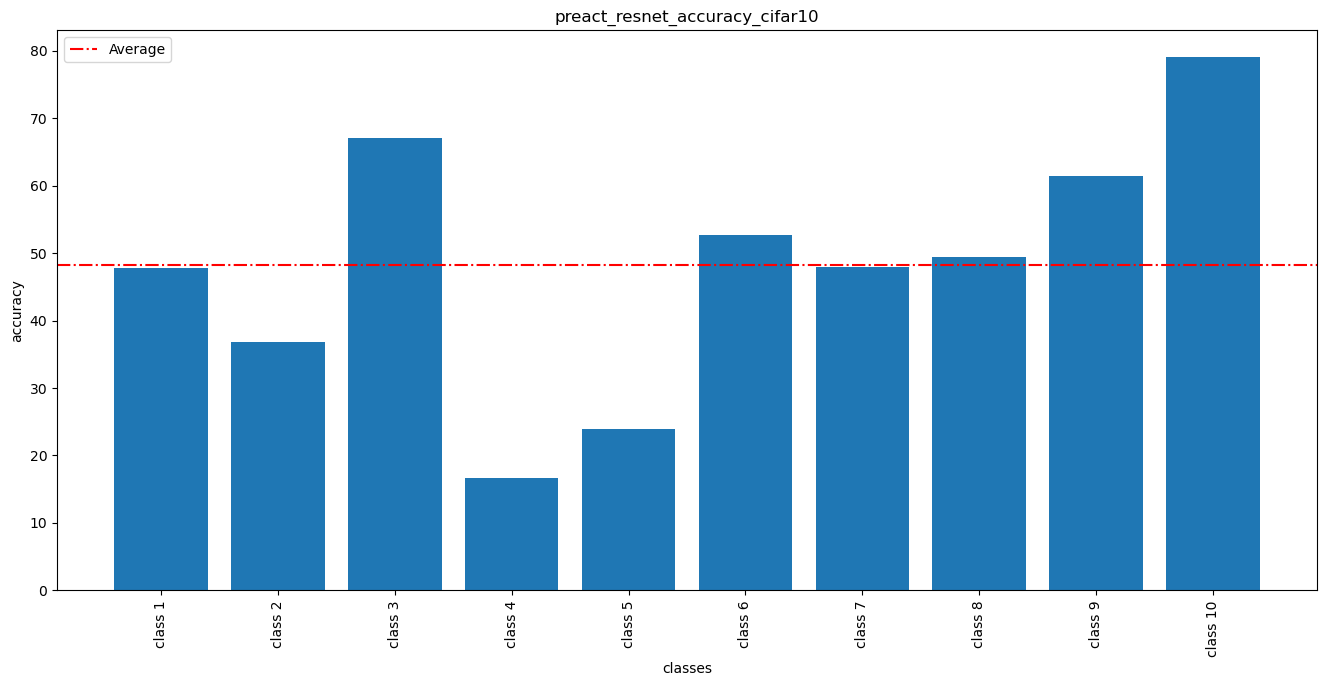

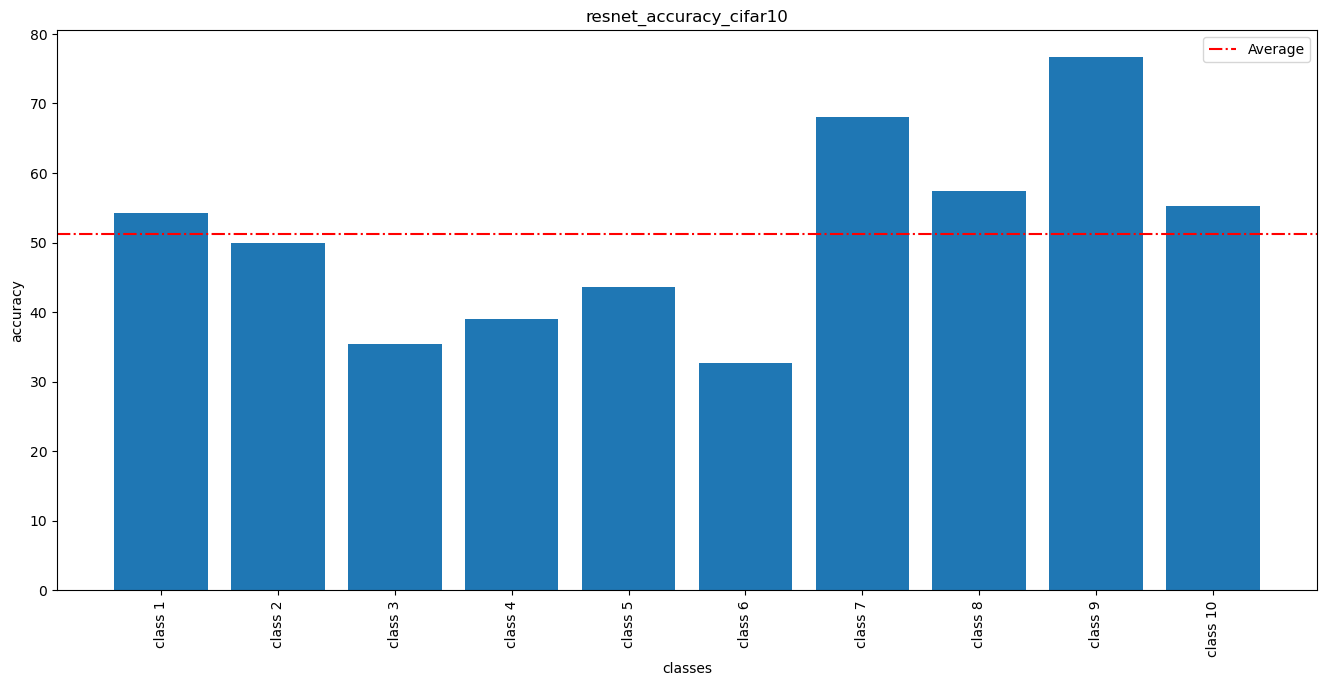

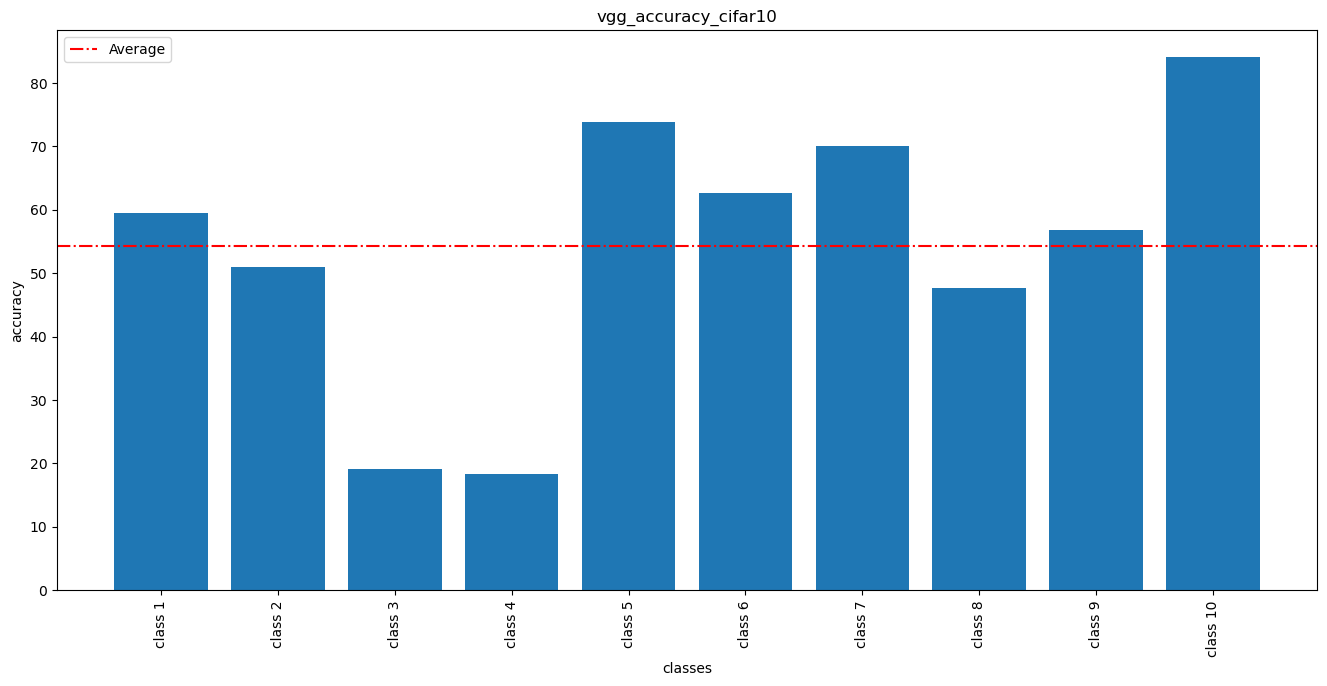

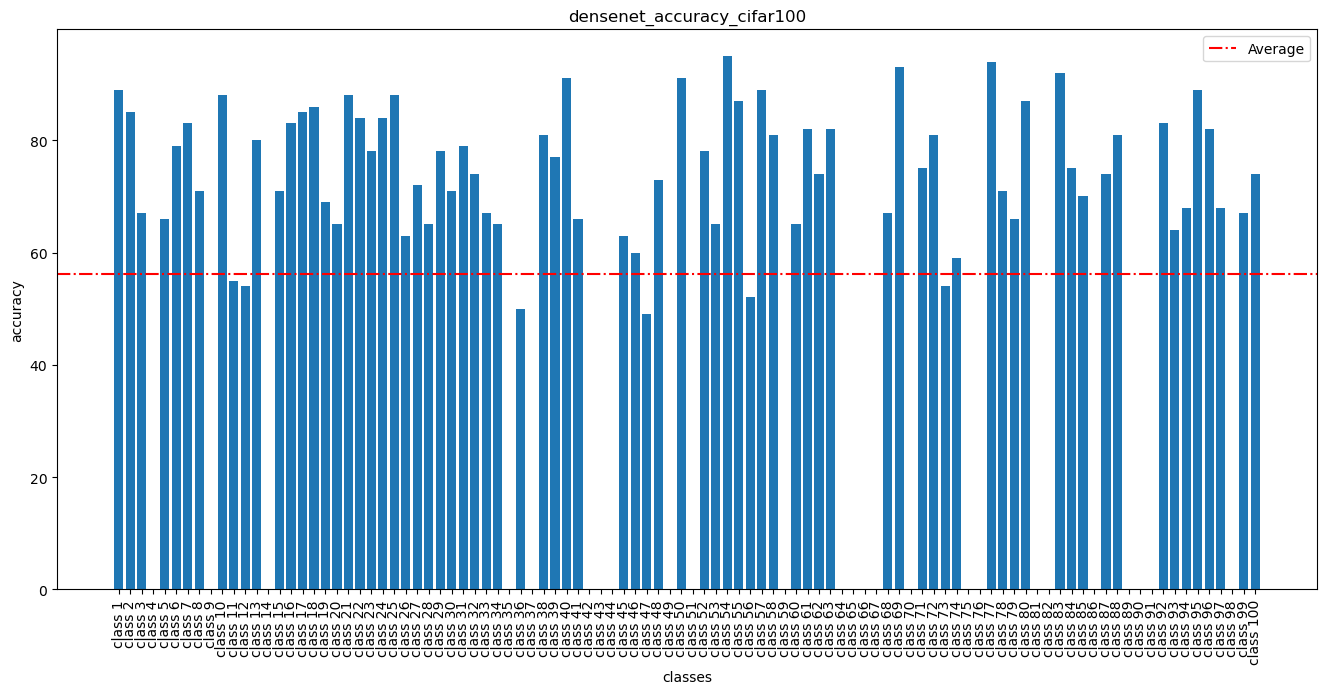

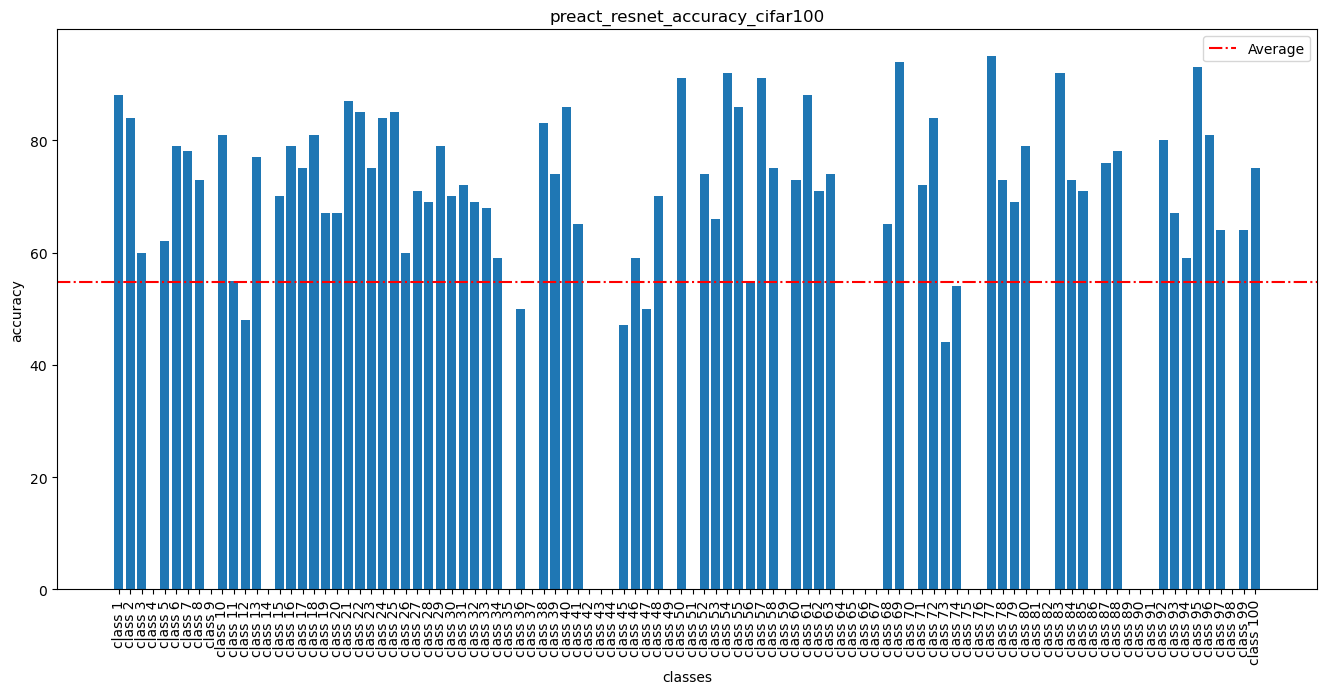

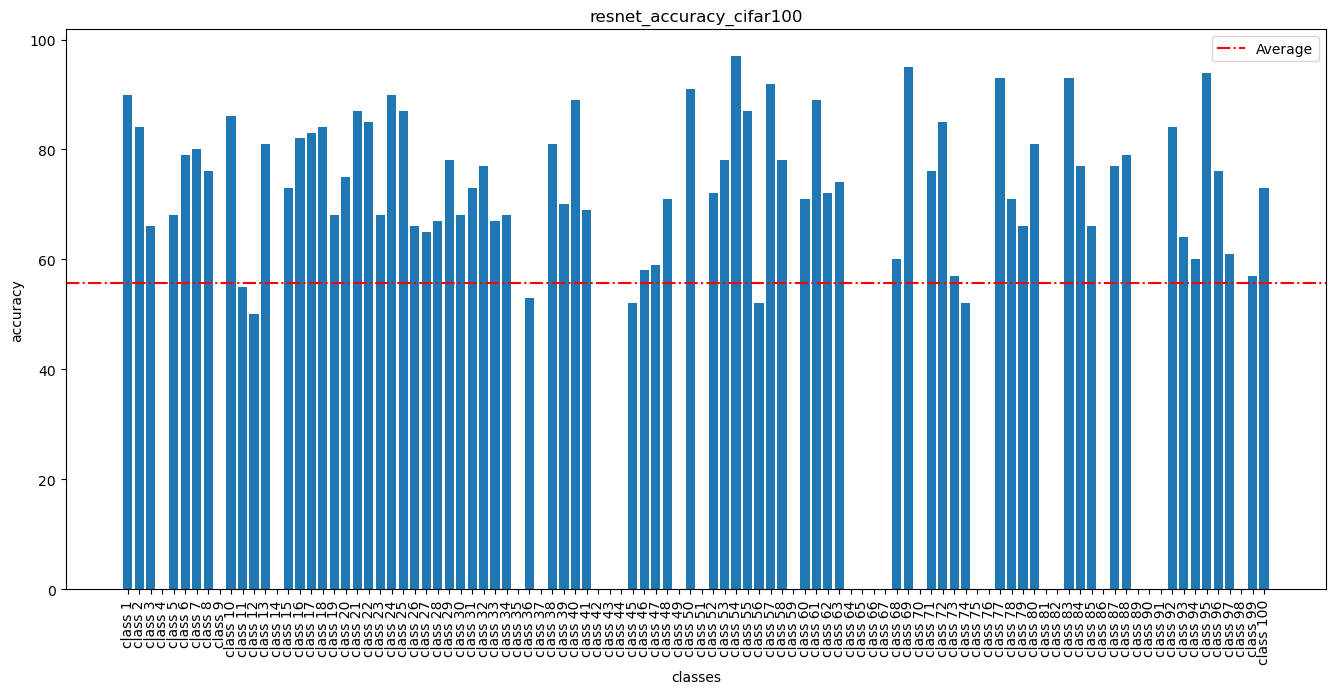

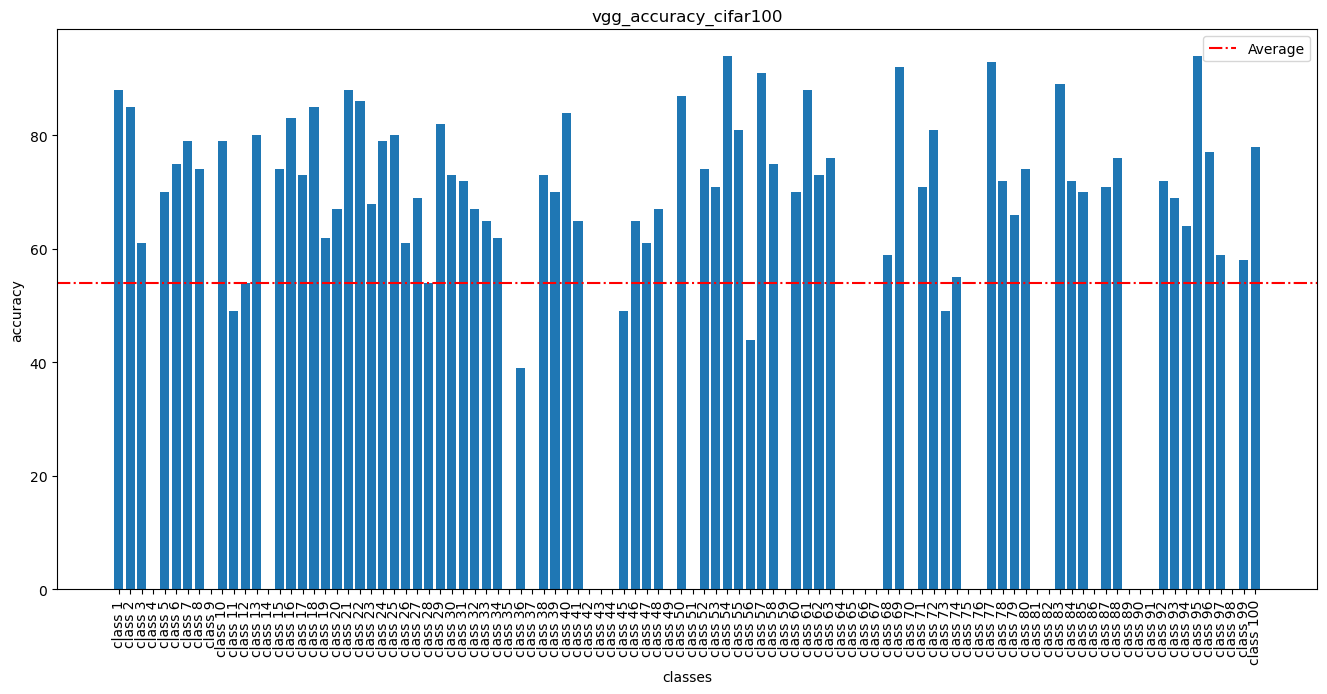

In [7]:
accuracies = [densenet_accuracy_cifar10, preact_resnet_accuracy_cifar10,
              resnet_accuracy_cifar10, vgg_accuracy_cifar10,
              densenet_accuracy_cifar100, preact_resnet_accuracy_cifar100, 
              resnet_accuracy_cifar100, vgg_accuracy_cifar100]

titles = ["densenet_accuracy_cifar10", "preact_resnet_accuracy_cifar10", 
          "resnet_accuracy_cifar10", "vgg_accuracy_cifar10", 
          "densenet_accuracy_cifar100", "preact_resnet_accuracy_cifar100", 
          "resnet_accuracy_cifar100", "vgg_accuracy_cifar100"]

for i in range(len(accuracies)):
    plotAccuracy(accuracies[i], titles[i])

## Loss

In [ ]:
def plotLoss(loss, title):
    n_epochs = len(loss)
    fig, axs = plt.subplots(1, n_epochs, figsize=(10,4))
    
    for epoch in range(n_epochs):
        axs[epoch].plot(loss[epoch, :])
        axs[epoch].set_xlabel("Iteration")
        axs[epoch].set_ylabel("Loss value")
        axs[epoch].set_title(f"epoch {epoch+1}")
    
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.savefig(PATH + "/imgs/" + title + ".png")
    plt.show()

In [28]:
def plotLoss(loss, title):
    n_epochs = len(loss)
    
    fig, ax = plt.subplots()
    
    for i, epoch in enumerate(loss):
        # 生成 x 轴的数据
        x = np.arange(len(epoch)) + len(epoch) * i
        # 绘制当前组数据的折线图
        ax.plot(x, epoch, label=f'epoch {i + 1}')
    
    ax.legend()
    plt.xlabel("Iteration")
    plt.ylabel("Loss value")
    plt.suptitle(title)
    plt.savefig(PATH + "/imgs/" + title + ".png")
    plt.show()

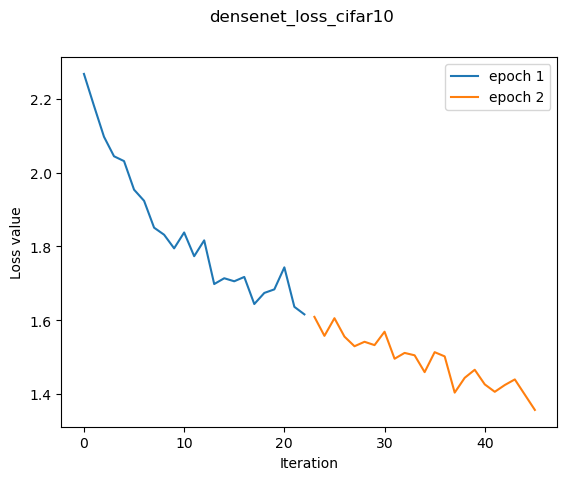

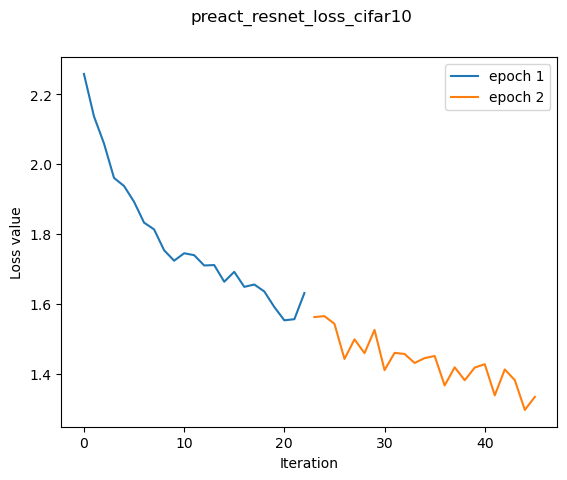

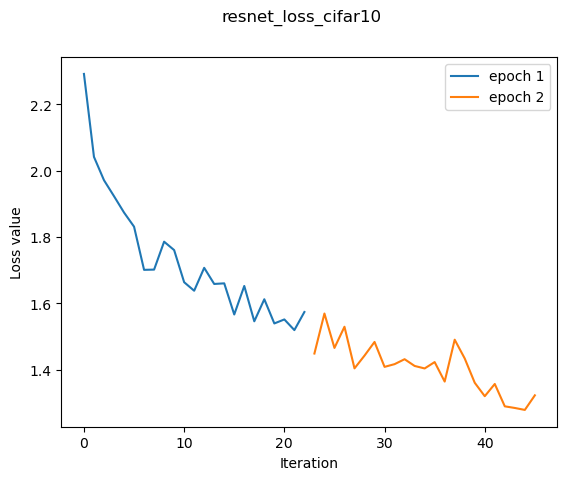

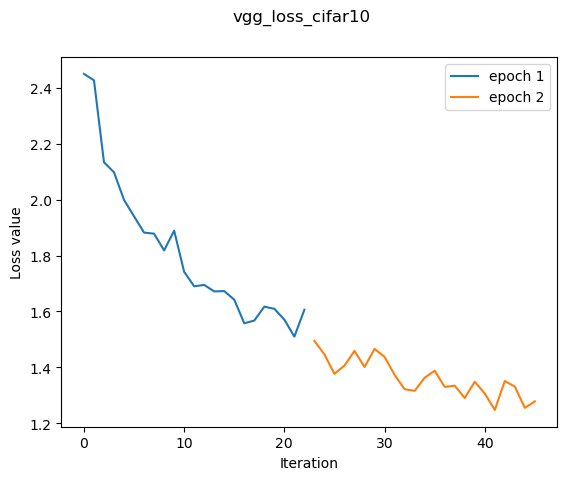

In [29]:
loss = [densenet_loss_cifar10, preact_resnet_loss_cifar10, 
        resnet_loss_cifar10, vgg_loss_cifar10]

titles = ["densenet_loss_cifar10", "preact_resnet_loss_cifar10", 
          "resnet_loss_cifar10", "vgg_loss_cifar10"]

for i in range(len(loss)):
    plotLoss(loss[i], titles[i])